---

# Session 3. Principle of decision trees and evaluation measures (Part2)

---



A tree is an **undirected** and **connected** graph. The set of nodes is divided into three categories:

- Root node (access to the tree is via this node),

- Internal nodes: nodes that have descendants (or children), who are in turn nodes,

- Terminal nodes (or leaves): nodes that have no descendants.

A decision tree is a machine-learning algorithm for solving **classification** and **regression** problems. They are  simple, **easy to understand** and to **interpret** by human operators, since they are able to trace the questions to be asked in order to make their choices.

Here are the algorithm steps: 

**1) Feature selection** :
The algorithm begins by selecting a feature that it believes is the best for dividing the data. This feature is selected on the basis of measures such as Gini/entropy index for classification or variance reduction for regression.

**2) Data division** :
The data is divided into subsets based on the value of the selected feature. For example, if the selected characteristic is temperature, the data can be divided into two groups: one with a temperature less or equal to a threshold, and another with a temperature greater than the threshold.

**3) Recursive repeat** :
This division is performed recursively to create a decision tree, where each node represents a feature and each branch represents a possible value of that feature. This process is repeated until a stopping condition is reached, for example when all leaves are pure (for classification) or when the maximum tree depth is reached.

**4) Prediction**:
To make a prediction, the data is traversed from the root node of the tree until a leaf is reached. The class (or value in the case of regression) associated with this leaf is then used as the prediction. 

**Example: IRIS dataset**

##### Train/test dataset division 
Divide the data set (X and Y) into two parts - a training set and a test set. 

![training split](Downloads/Training_Test_Split.png)

In [9]:
'''Take 30% at random and place it in your test set and 70% in the training set. 
Random_state: controls the shuffling applied to the data before applying the split'''

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Size of the training set :", X_train.shape)
print("Size of the test set :", X_test.shape)

Size of the training set : (105, 4)
Size of the test set : (45, 4)


##### Decision tree training (max depth=2)

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier with a tree depth=2
clf = DecisionTreeClassifier(max_depth=2)

#Fit the classifier to your training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

##### Decision tree display

In [11]:
# Plot the decision tree
plt.figure(figsize=(15, 10)) # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names) # Replace feature names with your actual feature names
plt.show()

InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['setosa', 'versicolor', 'virginica'], dtype='<U10') instead.

<Figure size 1500x1000 with 0 Axes>

As you can see, the algorithm starts by choosing a feature (here it's petal length). Depending on the value of petal length, it creates two internal nodes. A right node and a left node. The node on the left represents if petal length <= 2.45 and the node on the right represents a node if petal length>2.45. In each node, there are 4 variables:

- **gini**: impirity index that helps us choose the feature.
- **samples** : the number of observations in the training set that verified (or not) the condition of the previous level node. 
-  **value** : indicates the distribution of these observations in the different classes [x, y, z]: X setosa, Y versicolor and z virginica.
- **class** : corresponding class for this node 


##### Create a decision tree classifier with a maximum depth

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['setosa', 'versicolor', 'virginica'], dtype='<U10') instead.

<Figure size 1500x1000 with 0 Axes>

##### Test our decision tree for an example of the test set

In [ ]:
'''Look at the tree to determine the class of this instance (instance 5 of the test set)
The name of features : 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'''
example = X_test[3].reshape(1, -1)
print (example)

In [ ]:
#check your result with the model 
predicted_class = clf.predict(example)
print("Predicted class for specific example :", iris.target_names[predicted_class])
print ("Real class:", iris.target_names[y_test[3]])

##### Testing our decision tree for the whole test set

In [14]:
y_pred = clf.predict(X_test)

##### Evaluate our decision tree (confusion matrix, accuracy, recall, precision and F1 score) 

In [16]:
print(y_test) #real instances

print (y_pred) #predicted instances

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


### Evaluation measures 

##### Confusion matrix

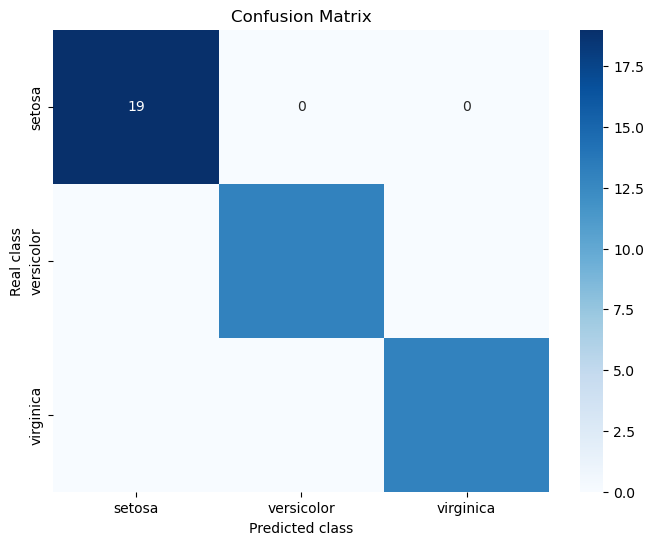

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculation of confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculation of precision
precision = precision_score(y_test, y_pred, average='micro')

# Recall calculation
recall = recall_score(y_test, y_pred, average='micro')

# F1 score calculation
f1 = f1_score(y_test, y_pred, average='micro')

# Display results
print("Confusion matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

##### Binary classification exercise 

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Definition of actual and predicted values
ACTUAL = [1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
PREDICTION = [1, 0, 1, 1, 1, 0, 1, 0, 1, 0]


# Calculation of confusion matrix
conf_matrix = confusion_matrix(ACTUAL, PREDICTION)

# Display confusion matrix
print("Confusion matrix:")
print(conf_matrix)


In [ ]:
# Calculation of the rate of correct classification 
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

# Display accuracy
print("Accuracy:", accuracy)


In [ ]:
# Calculation of precision
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display precision
print("Precision:", precision)

In [ ]:
# Recall calculation
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# Display recall
print("Recall:", recall)


In [ ]:
# F1 score calculation
f1_score = 2 * (precision * recall) / (precision + recall)

# Display F1 score
print("Score F1:", f1_score)
